In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Loading the image and returning it as a numpy array in grayscaly
def image_load(path):
    img = Image.open(path).convert('L')
    return np.array(img)

In [5]:
# creating a one-dimenational Guassian Mask
def gaussian_kernel_d(size, sigma):
    kernel = np.zeros(size)
    center = size // 2
    for i in range(size):
        dist = (i - center) ** 2
        kernel[i] = np.exp( -dist / (2 * sigma ** 2))
    return kernel / np.sum(kernel)



In [6]:
# creating a one-dimenational Guassian Mask
def gaussian_kernel_c(size, sigma):
    kernel = np.zeros(size)
    center = size // 2
    for i in range(size):
        dist = (i - center) ** 2
        kernel[i] = np.exp(-dist / (2 * sigma ** 2)) / (np.sqrt(2 * np.pi) * sigma)
    return kernel


In [8]:
# Create a 1D Gaussian derivative kernel for x and y directions
def gaussian_derivative_kernel_d(size, sigma):
    kernel = np.zeros(size)
    center = size // 2
    for i in range(size):
        dist = i - center
        kernel[i] = -dist * np.exp(-dist ** 2 / (2 * sigma ** 2))
    return kernel / np.sum(np.abs(kernel))



In [9]:
# Create a 1D Gaussian derivative kernel for x and y directions
def gaussian_derivative_kernel_c(size, sigma):
    kernel = np.zeros(size)
    center = size // 2
    for i in range(size):
        dist = i - center
        kernel[i] = (-dist * np.exp(-dist ** 2 / (2 * sigma ** 2))) / (np.sqrt(2 * np.pi) * sigma ** 3)
    return kernel


In [11]:
a = gaussian_kernel_d(7, 1)
b = gaussian_kernel_c(7, 1)
c = gaussian_derivative_kernel_d(7, 1)
d = gaussian_derivative_kernel_c(7, 1)
print(a, sum(a))
print(b, sum(b))
print(c, np.abs(c).sum())
print(d, np.abs(d).sum())

[0.00443305 0.05400558 0.24203623 0.39905028 0.24203623 0.05400558
 0.00443305] 0.9999999999999999
[0.00443185 0.05399097 0.24197072 0.39894228 0.24197072 0.05399097
 0.00443185] 0.9997293592899715
[ 0.01830091  0.14863382  0.33306527  0.         -0.33306527 -0.14863382
 -0.01830091] 0.9999999999999999
[ 0.01329555  0.10798193  0.24197072  0.         -0.24197072 -0.10798193
 -0.01329555] 0.726496405562667


In [34]:
# 1-Dimension Convolving for a given image and kernel 
def convolve(image, kernel):
    padding_size = kernel.shape[0] // 2
    padded_image = np.pad(image, padding_size, mode='constant', constant_values=0)
    output = np.zeros_like(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i, j:j + kernel.shape[0]]
            output[i, j] = np.sum(region * kernel)
    
    return output

In [40]:
# Computing the gradient magnitude and direction
def compute_gradient_magnitude_and_direction(i_x, i_y):
    magnitude = np.sqrt(i_x ** 2 + i_y ** 2)
    direction = np.arctan2(i_y, i_x)
    return magnitude, direction


(array([4.12310563, 5.38516481, 6.70820393]),
 array([1.32581766, 1.19028995, 1.10714872]))

In [84]:
def non_maximum_suppression(magnitude, direction):
    # Step 1: Create an empty array for the output
    output = np.zeros_like(magnitude)
    
    # Step 2: Convert direction to degrees
    angle = np.rad2deg(direction) % 180  # Convert angles from radians to degrees and map them to [0, 180)
    
    # Step 3: Loop through height and width of an image and excluding the border pixels
    for i in range(1, magnitude.shape[0] - 1):  
        for j in range(1, magnitude.shape[1] - 1):  
            q, r = 255, 255  # Initialize neighboring magnitudes
            
            # Step 4: Compare the gradient direction and look at the neighbors
            # Angle 0 degrees (left/right neighbors)
            if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                # Right neighbor
                q = magnitude[i, j + 1]
                # Left neighbor  
                r = magnitude[i, j - 1]  
            # Angle 45 degrees (bottom-left/top-right diagonal)
            elif 22.5 <= angle[i, j] < 67.5:
                # Bottom-left diagonal neighbor
                q = magnitude[i + 1, j - 1] 
                # Top-right diagonal neighbor
                r = magnitude[i - 1, j + 1] 
            # Angle 90 degrees (top/bottom neighbors)
            elif 67.5 <= angle[i, j] < 112.5:
                # Bottom neighbor
                q = magnitude[i + 1, j]
                # Top neighbor
                r = magnitude[i - 1, j]
            # Angle 135 degrees (top-left/bottom-right diagonal)
            elif 112.5 <= angle[i, j] < 157.5:
                # Top-left diagonal neighbor
                q = magnitude[i - 1, j - 1]  
                # Bottom-right diagonal neighbor
                r = magnitude[i + 1, j + 1] 
            
            # Step 5: Suppress non-maxima
            if magnitude[i, j] >= q and magnitude[i, j] >= r:
                output[i, j] = magnitude[i, j]
            else:
                output[i, j] = 0
    
    return output


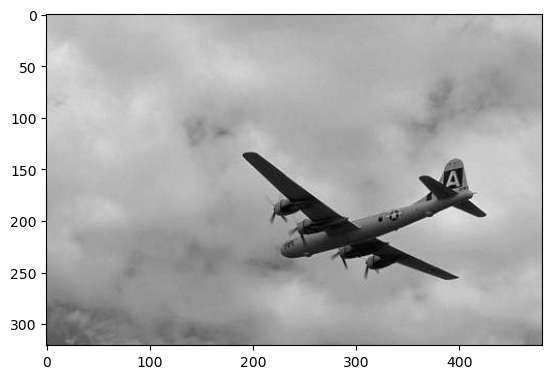

In [107]:
I1 = image_load('3096.jpg')
I1
plt.imshow(I1, cmap='gray')

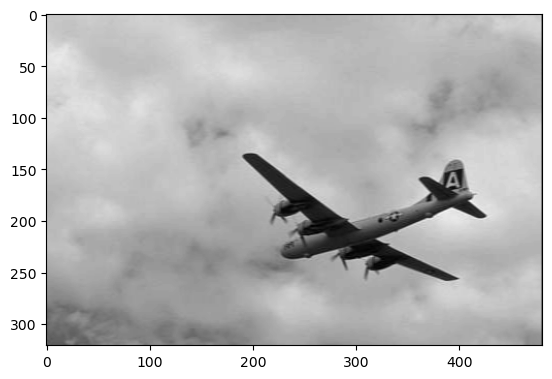

In [108]:
a = convolve(I1, gaussian_kernel(3, 5))
plt.imshow(a, cmap='gray')

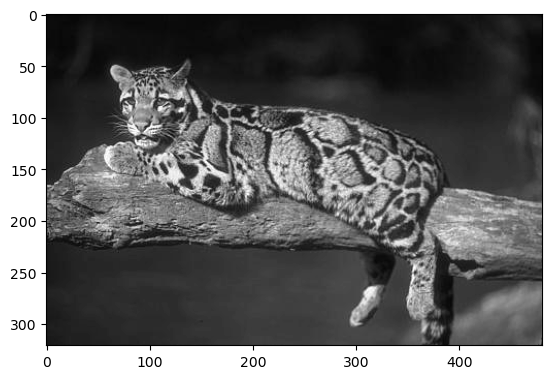

In [109]:
I2 = image_load('160068.jpg')
I2
plt.imshow(I2, cmap='gray')

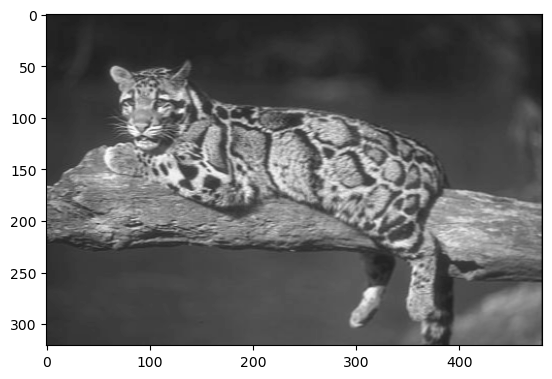

In [119]:
b = convolve(I2, gaussian_kernel(3, 2))
plt.imshow(b, cmap='gray')

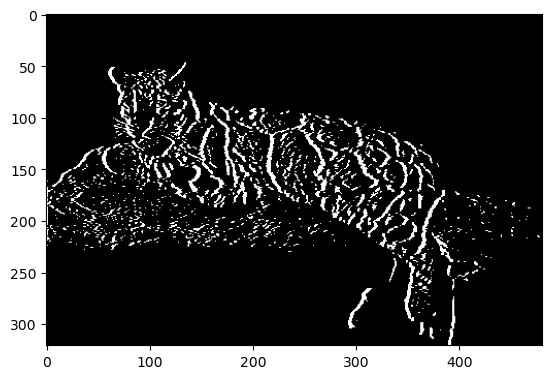

In [123]:
c = convolve(b, gaussian_derivative_kernel_c(3, 2))
plt.imshow(c, cmap='gray')